# Section 2 Exploratory Data Analysis (EDA) for Data Understanding

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
orders_full = pd.read_csv("mergedData.csv")

## 2.1 Univariate Analysis

In [4]:
orders_full['order_value'].describe().astype('int')

count    2529486
mean         547
std          938
min            0
25%           71
50%          153
75%          517
max         6735
Name: order_value, dtype: int32

In [5]:
orders_full['payment_value'].describe().astype('int')

count    2529486
mean         282
std          363
min            0
25%           82
50%          174
75%          326
max         7274
Name: payment_value, dtype: int32

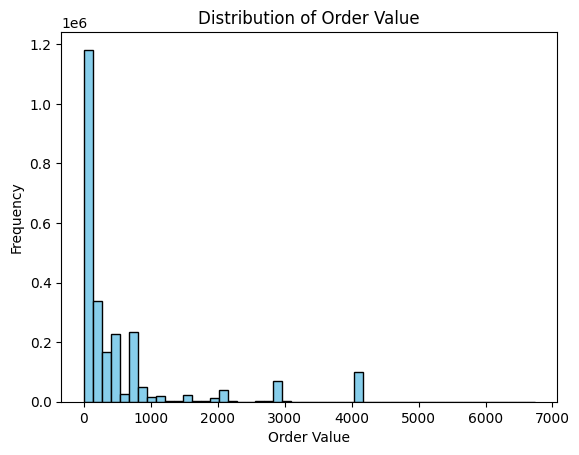

In [6]:
plt.hist(orders_full['order_value'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Order Value")
plt.xlabel("Order Value")
plt.ylabel("Frequency")
plt.show()

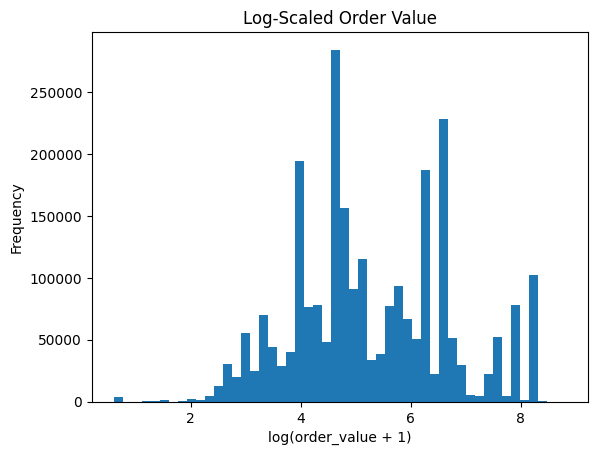

In [7]:
order_value_log = np.log1p(orders_full['order_value'])

plt.hist(order_value_log, bins=50)
plt.title("Log-Scaled Order Value")
plt.xlabel("log(order_value + 1)")
plt.ylabel("Frequency")
plt.show()

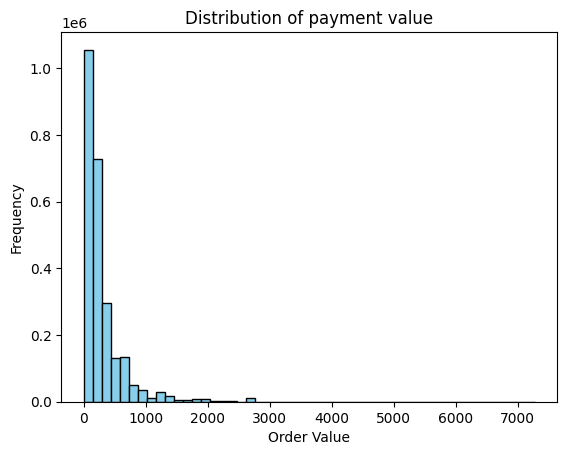

In [8]:
plt.hist(orders_full['payment_value'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of payment value")
plt.xlabel("Order Value")
plt.ylabel("Frequency")
plt.show()

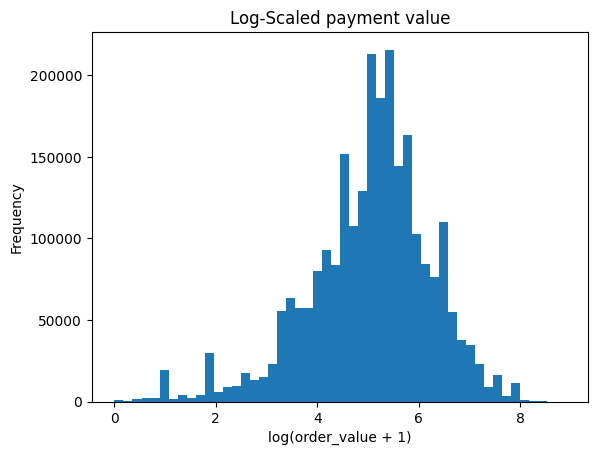

In [9]:
order_value_log = np.log1p(orders_full['payment_value'])

plt.hist(order_value_log, bins=50)
plt.title("Log-Scaled payment value")
plt.xlabel("log(order_value + 1)")
plt.ylabel("Frequency")
plt.show()

In [10]:
orders_full['freight_value'].describe().round(4)

count    2.529486e+06
mean     4.273110e+01
std      3.706840e+01
min      0.000000e+00
25%      1.840000e+01
50%      3.391000e+01
75%      5.442000e+01
max      4.096800e+02
Name: freight_value, dtype: float64

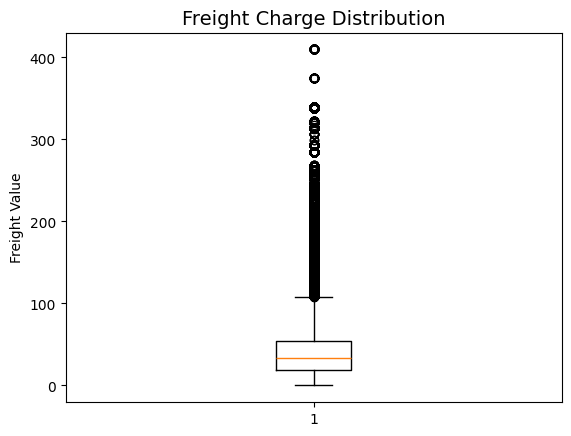

In [11]:
plt.boxplot(orders_full['freight_value'])
plt.title('Freight Charge Distribution', fontsize=14)
plt.ylabel('Freight Value')
plt.show()

In [12]:
orders_full.groupby('order_status')['freight_value'].mean().sort_values(ascending=False).round(3)

order_status
approved       56.655
unavailable    52.898
invoiced       46.238
processing     45.589
shipped        44.252
delivered      42.723
canceled       34.011
Name: freight_value, dtype: float64

This suggests freight cost alone is not causing order cancellation.

<Axes: xlabel='items_per_order', ylabel='Count'>

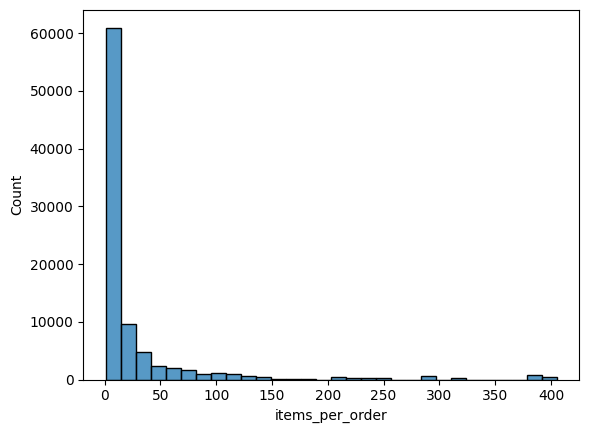

In [13]:
order_qty = orders_full.groupby('order_id')['product_id'].count().reset_index(name='items_per_order')
order_qty['items_per_order'].value_counts().sort_index()
sns.histplot(order_qty['items_per_order'], bins=30)

In [14]:
orders_full.groupby('customer_state')['order_id'].nunique().sort_values(ascending=False)

customer_state
SP    37879
RJ    11578
MG    10334
RS     4921
PR     4523
SC     3213
BA     3088
GO     1868
ES     1798
DF     1793
PE     1493
CE     1141
MT      848
PA      817
MS      637
MA      623
PB      497
PI      423
RN      381
AL      342
SE      305
TO      247
RO      241
AM      140
AC       75
AP       68
RR       43
Name: order_id, dtype: int64

<Axes: xlabel='customer_state'>

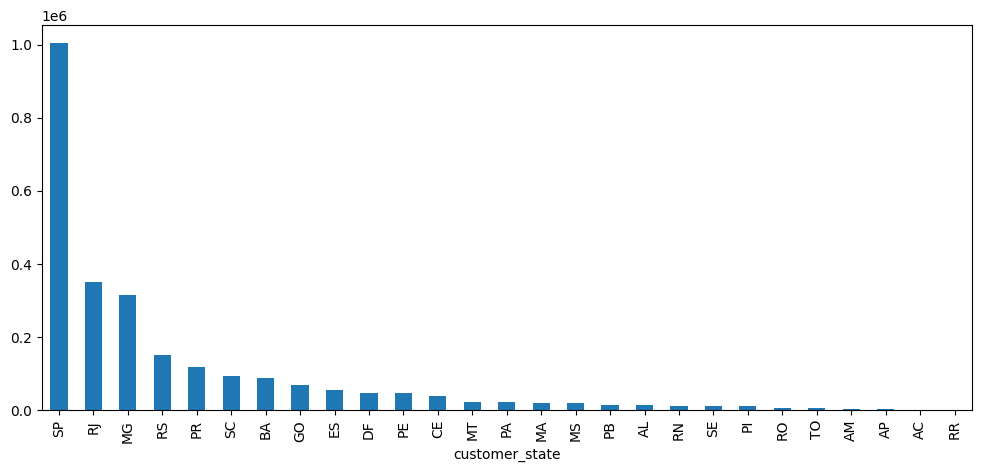

In [15]:
orders_full['customer_state'].value_counts().plot(kind='bar', figsize=(12, 5))

In [16]:
orders_full['category'].value_counts().head()

category
toys         1869621
health        161543
computers     103222
garden         96819
watches        81796
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='category'>

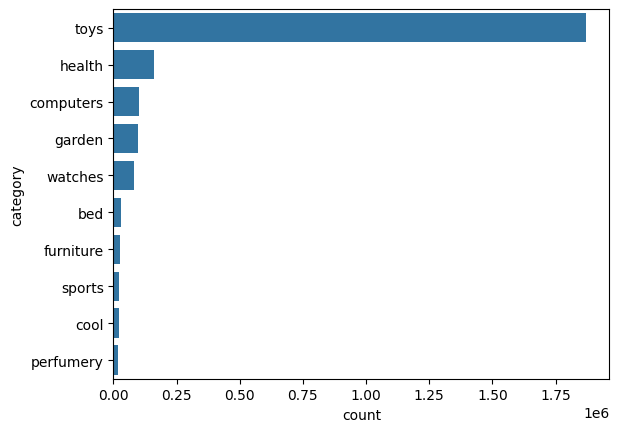

In [17]:
sns.countplot(y='category', data=orders_full, order=orders_full['category'].value_counts().index[:10])

In [18]:
orders_full.groupby('order_status')['order_status'].value_counts()

order_status
approved             2
canceled          4199
delivered      2493462
invoiced          2623
processing        1823
shipped          27355
unavailable         22
Name: count, dtype: int64

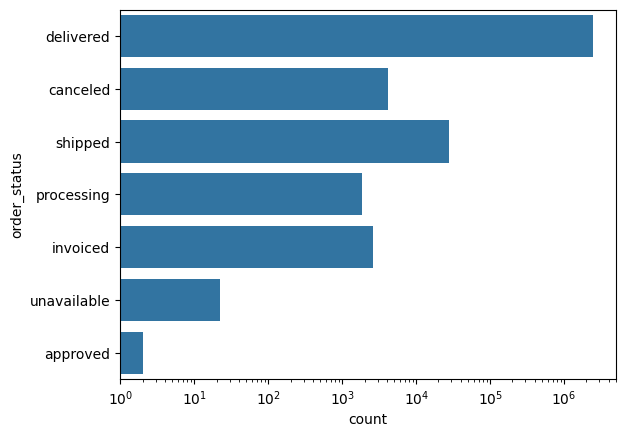

In [19]:
sns.countplot(data = orders_full, y = 'order_status')
plt.xscale('log')
plt.show()

In [20]:
orders_full.groupby('payment_type')['payment_type'].value_counts()

payment_type
credit_card    1822547
debit_card       31555
voucher         131220
wallet          544164
Name: count, dtype: int64

## 2.2 Bivariate Analysis

In [21]:
orders_full['payment_difference'] = orders_full['payment_value'] - orders_full['order_value']
orders_full[['payment_difference', 'payment_value', 'order_value']].describe().astype('int')

,payment_difference,payment_value,order_value
count,2529486,2529486,2529486
mean,-264,282,547
std,998,363,938
min,-6669,0,0
25%,-344,82,71
50%,-17,174,153
75%,144,326,517
max,7049,7274,6735


In 50% of transactions, payment value is less than order_value. It may be due to discount coupons

In [22]:
orders_full[['order_value', 'freight_value']].corr()

,order_value,freight_value
order_value,1.000000,0.010179
freight_value,0.010179,1.000000


There is no relationship between order_value and freight_value

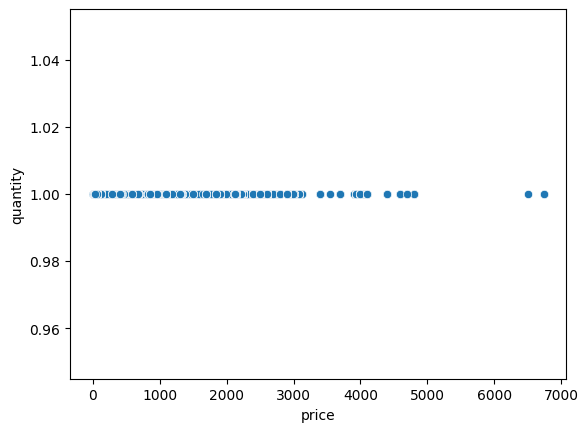

In [23]:
## Doubt
sns.scatterplot(data=orders_full, x='price', y='quantity')
plt.show()